<a href="https://colab.research.google.com/github/Nirhoshan/Image-Processing/blob/main/assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline


In [ ]:
def derivative(f,a,method='central',h=0.01):
   
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

Part 1

In [2]:
def accuracy(labels,preds):
  real_cls=np.argmax(labels,axis=1)
  pred_cls=np.argmax(preds, axis=1)  
  valid_pred=[pred_cls==real_cls]
  acc=100*np.sum(valid_pred)/len(real_cls)
  return acc

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('Reshaped x_train: ', x_train.shape)


170500096/170498071 [==============================] - 2s 0us/step
x_train:  (50000, 32, 32, 3)
Reshaped x_train:  (50000, 3072)


In [4]:
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr
iterations = 300
lr = 1.4e-2
lr_decay= 0.999
print(lr)
print(lr_decay)
reg =5e-6
loss_history = []
lr_history=[]
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
  # Forward pass
  y_pred=np.dot(x_train,w1)+b1
  loss=np.sum((y_pred-y_train)**2)/Ntr + reg*np.sum(w1**2)
  #print(loss)
  loss_history.append(loss)

  # Backward pass
  dw1 = 2*(1/Ntr)*(x_train.T.dot(y_pred - y_train))  + 2*reg*w1 
  w1 = w1 - lr*dw1
  I=np.ones((Ntr,1))
  db1=2*(1/Ntr)*(I.T.dot(y_pred - y_train))
  b1=b1-lr*db1

  #Accuracies
  #train_acc = accuracy(y_train,y_pred)
  train_acc=1.0-(1/Ntr)*(np.absolute(np.argmax(y_train,axis=1)-np.argmax(y_pred,axis=1))).sum()/K
  train_acc_history.append(train_acc)
  #test_acc = accuracy( y_test, np.dot(x_test,w1)+b1)
  test_acc=1.0-(1/Nte)*(np.absolute(np.argmax(y_test,axis=1)-np.argmax(np.dot(x_test,w1)+b1,axis=1))).sum()/K
  val_acc_history.append(test_acc)

  if (t%30==0) or (t==1) or t==iterations-1:
    print("Epoch {:03} - Loss {:.4f} - Training Accuracy: {:.3f} - Testing Accuracy: {:.2f} - Learning Rate: {:.5f}"
              .format(t,loss,train_acc,test_acc,lr))
  lr_history.append(lr)
  lr=lr*lr_decay
print("Done")
#indices = np.arange(Ntr)
#rng.shuffle(indices)


# Printing accuracies and displaying w as images

w1: (3072, 10)
b1: (10,)
0.014
0.999
Epoch 000 - Loss 1.0000 - Training Accuracy: 0.686 - Testing Accuracy: 0.72 - Learning Rate: 0.01400
Epoch 001 - Loss 0.9579 - Training Accuracy: 0.712 - Testing Accuracy: 0.74 - Learning Rate: 0.01399
Epoch 030 - Loss 0.8236 - Training Accuracy: 0.766 - Testing Accuracy: 0.77 - Learning Rate: 0.01359
Epoch 060 - Loss 0.8009 - Training Accuracy: 0.772 - Testing Accuracy: 0.77 - Learning Rate: 0.01318
Epoch 090 - Loss 0.7939 - Training Accuracy: 0.774 - Testing Accuracy: 0.77 - Learning Rate: 0.01279
Epoch 120 - Loss 0.7906 - Training Accuracy: 0.776 - Testing Accuracy: 0.77 - Learning Rate: 0.01242
Epoch 150 - Loss 0.7884 - Training Accuracy: 0.777 - Testing Accuracy: 0.77 - Learning Rate: 0.01205
Epoch 180 - Loss 0.7868 - Training Accuracy: 0.778 - Testing Accuracy: 0.77 - Learning Rate: 0.01169
Epoch 210 - Loss 0.7856 - Training Accuracy: 0.779 - Testing Accuracy: 0.77 - Learning Rate: 0.01135
Epoch 240 - Loss 0.7845 - Training Accuracy: 0.779 - T

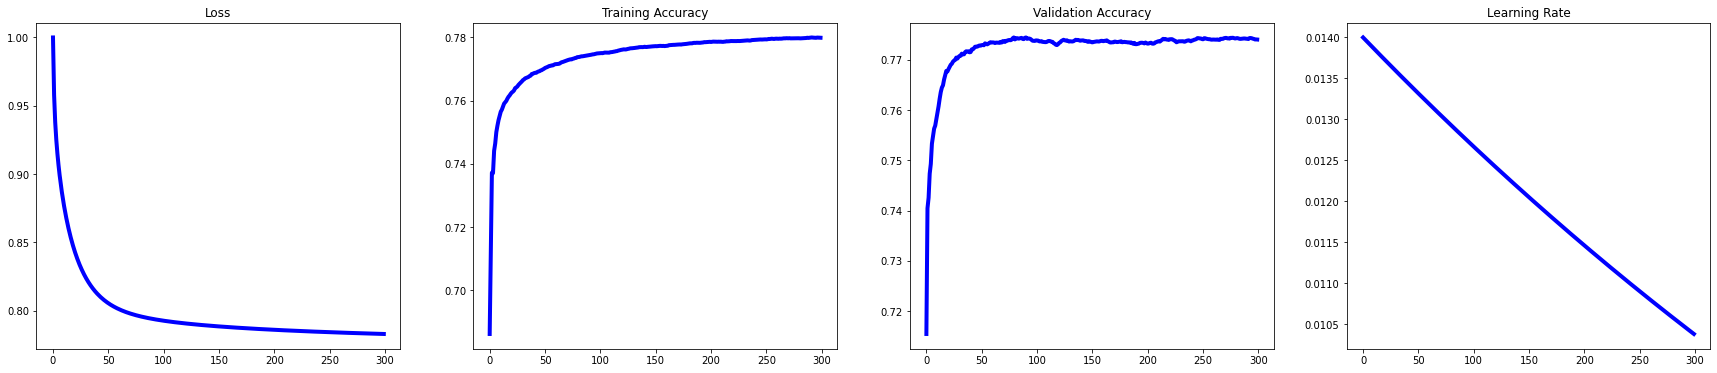

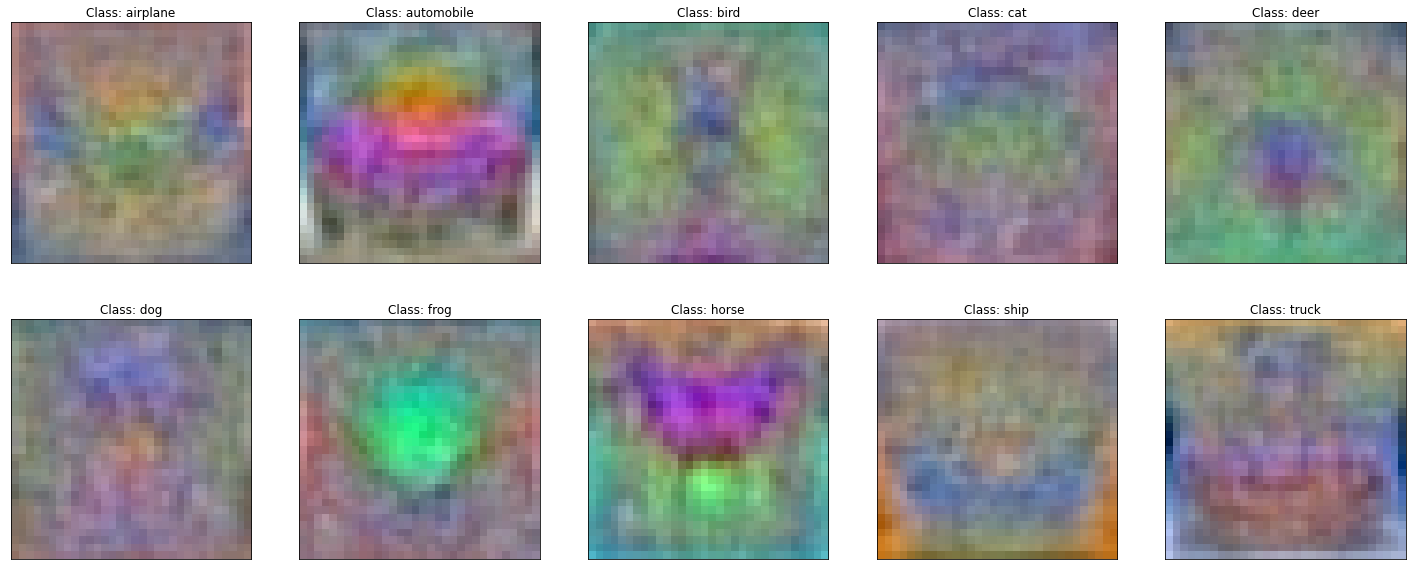

In [5]:
fig, axes  = plt.subplots(1,4, sharex='all', sharey='all', figsize=(30,6))
items = {"Loss":loss_history, "Training Accuracy":train_acc_history,\
         "Validation Accuracy": val_acc_history, "Learning Rate":lr_history}
location = 1
for key in items.keys():
    plt.subplot(1,4,location);plt.plot(items[key], color='#0000ff', linewidth=4)
    plt.title(key)
    location+=1


# -------------------Showing the weights matrix W1 as 10 images-----------------
weights = w1 # Removing the row of bias terms.
weights_pos =  weights- np.min(weights)# Making the minimum weight zero.
images = ((weights_pos/np.max(weights_pos))*255).astype('uint8')
CIFAR10 = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes  = plt.subplots(2,5, sharex='all', sharey='all', figsize=(25,10))
location = 1 # Location of the image in the grid of 2x5
for i in range(K):
    image = images[:,i].reshape(32,32,3)
    plt.subplot(2,5,location),plt.imshow(image[:,:,::-1])
    plt.title("Class: {}".format(CIFAR10[i])),plt.xticks([]),plt.yticks([])    
    location+=1

Part 2

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:_', x_train.shape)

Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train = x_train[range(Ntr),:]
x_test = x_test[range(Nte),:]
y_train = y_train[range(Ntr)]
y_test = y_test[range(Nte)]
K = len(np.unique(y_train)) 
 
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
 
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

H=200

std=1e-6
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)
b1=np.zeros(H)
b2=np.zeros(K)
print("w1:",w1.shape)
print("b1:",b1.shape)
print("w2:",w2.shape)
print("b2:",b2.shape)
batch_size = Ntr

iterations = 300    
lr=1.4e-2 #0.005
lr_decay = 0.999
reg = 5e-6
loss_history = []
learning_rate=[]
train_acc_history = []
val_acc_history = []
for t in range(iterations):
    batch_indices= np.random.choice(Ntr,batch_size)
    x=x_train[batch_indices]
    y=y_train[batch_indices]
    h=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
    y_pred = h.dot(w2)+b2
    loss = (1./batch_size)*np.square(y_pred-y).sum() + reg*(np.sum(w2*w2)+np.sum(w1*w1))
    loss_history.append(loss)
    if t%30 == 0:
        print("iterarion %d/%d: loss %f" %(t,iterations,loss))
    dy_pred = (1.0/batch_size)*2.0*(y_pred-y)
    dw2=h.T.dot(dy_pred)+reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x.T.dot(dh*h*(1-h)) + reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -=lr*db1
    b2 -= lr*db2
    lr = lr*lr_decay
print("Done")

x_train:_ (50000, 32, 32, 3)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
iterarion 0/300: loss 1.000009
iterarion 30/300: loss 0.843045
iterarion 60/300: loss 0.818755
iterarion 90/300: loss 0.801488
iterarion 120/300: loss 0.785954
iterarion 150/300: loss 0.775283
iterarion 180/300: loss 0.772090
iterarion 210/300: loss 0.759115
iterarion 240/300: loss 0.755503
iterarion 270/300: loss 0.750729
Done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


xt (50000, 3072)
train_acc 0.794542
xt (10000, 3072)
test_acc 0.78323


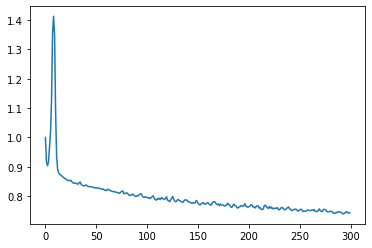

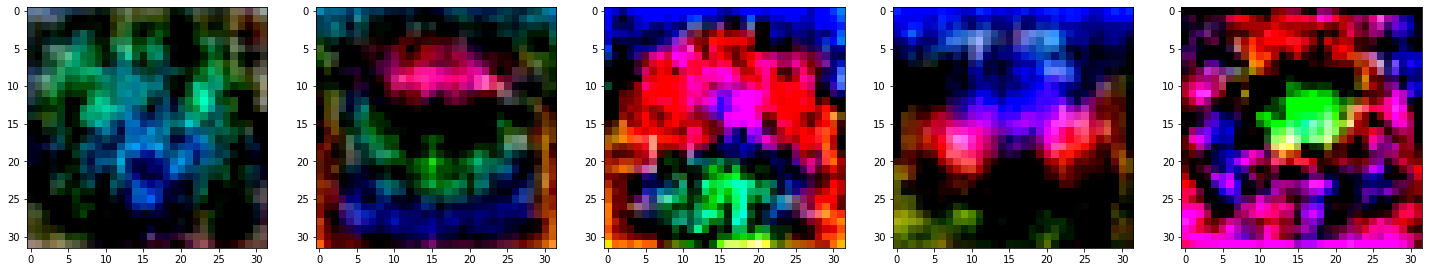

In [8]:
plt.plot(loss_history)
fig,ax=plt.subplots(1,5,figsize=(25,10))

for i in range(5):
    img=w1[:,i].reshape(32,32,3)
    ax[i].imshow(img*1000)
plt.show


xt=x_train
print('xt',xt.shape)
h=1/(1+np.exp(-(xt.dot(w1)+b1)))
y_pred=h.dot(w2)+b2

train_acc= 1-1/Ntr *(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred,axis=1))).sum()/K
#train_acc = accuracy(y_train,y_pred)
print('train_acc',train_acc)

xt=x_test
print('xt',xt.shape)
h=1/(1+np.exp(-(xt.dot(w1)+b1)))
y_pred=h.dot(w2)+b2

test_acc= 1-1/Nte *(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred,axis=1))).sum()/K
#test_acc = accuracy(y_test, y_pred)
print('test_acc',test_acc)


Part 3

In [13]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:_', x_train.shape)

Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train = x_train[range(Ntr),:]
x_test = x_test[range(Nte),:]
y_train = y_train[range(Ntr)]
y_test = y_test[range(Nte)]
K = len(np.unique(y_train)) 
 
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
 
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

H=200

std=1e-6
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)
b1=np.zeros(H)
b2=np.zeros(K)
print("w1:",w1.shape)
print("b1:",b1.shape)
print("w2:",w2.shape)
print("b2:",b2.shape)
batch_size = 500 #Ntr

iterations = 300    
lr=1.4e-2 #0.005
lr_decay = 0.999
reg = 5e-6
loss_history = []
learning_rate=[]
train_acc_history = []
val_acc_history = []
for t in range(iterations):
    batch_indices= np.random.choice(Ntr,batch_size)
    x=x_train[batch_indices]
    y=y_train[batch_indices]
    h=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
    y_pred = h.dot(w2)+b2
    loss = (1./batch_size)*np.square(y_pred-y).sum() + reg*(np.sum(w2*w2)+np.sum(w1*w1))
    loss_history.append(loss)
    if t%30 == 0:
        print("iterarion %d/%d: loss %f" %(t,iterations,loss))
    dy_pred = (1.0/batch_size)*2.0*(y_pred-y)
    dw2=h.T.dot(dy_pred)+reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x.T.dot(dh*h*(1-h)) + reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -=lr*db1
    b2 -= lr*db2
    lr = lr*lr_decay

x_train:_ (50000, 32, 32, 3)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
iterarion 0/300: loss 0.999995
iterarion 30/300: loss 0.855009
iterarion 60/300: loss 0.822953
iterarion 90/300: loss 0.817192
iterarion 120/300: loss 0.798503
iterarion 150/300: loss 0.771648
iterarion 180/300: loss 0.774770
iterarion 210/300: loss 0.776626
iterarion 240/300: loss 0.750284
iterarion 270/300: loss 0.766239


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


xt (50000, 3072)
train_acc 0.794088
xt (10000, 3072)
test_acc 0.78845


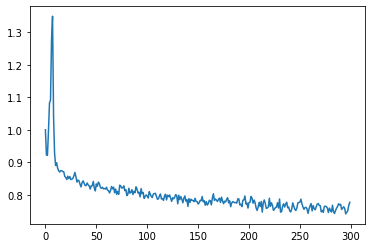

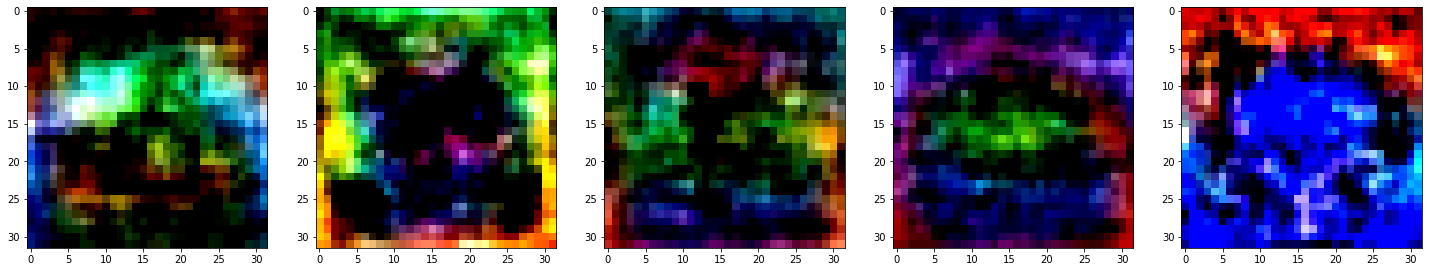

In [14]:
plt.plot(loss_history)
fig,ax=plt.subplots(1,5,figsize=(25,10))

for i in range(5):
    img=w1[:,i].reshape(32,32,3)
    ax[i].imshow(img*1000)
plt.show


xt=x_train
print('xt',xt.shape)
h=1/(1+np.exp(-(xt.dot(w1)+b1)))
y_pred=h.dot(w2)+b2

train_acc= 1-1/Ntr *(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred,axis=1))).sum()/K
#train_acc = accuracy(y_train,y_pred)
print('train_acc',train_acc)

xt=x_test
print('xt',xt.shape)
h=1/(1+np.exp(-(xt.dot(w1)+b1)))
y_pred=h.dot(w2)+b2

test_acc= 1-1/Nte *(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred,axis=1))).sum()/K
#test_acc = accuracy(y_test, y_pred)
print('test_acc',test_acc)

Part 4

In [10]:
print(tf.__version__)

#mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()


print('train_images.shape: ', train_images.shape)
print('train_labels.shape: ', train_labels.shape)
print('test_images.shape:', test_images.shape)
print('test_labels.shape:', test_labels.shape)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)
train_images = train_images / 255.0
test_images = test_images / 255.0

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(keras.layers.Dense(10, activation='softmax'))
	# compile model
#opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
#model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	 
'''
        model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
'''
opt = keras.optimizers.SGD(lr=0.01, momentum=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'] )
'''
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

'''
# fit model
print(model.summary())
#history = model.fit(train_images, train_labels, epochs=300, batch_size=50, verbose=1)#validation_data=(test_images, test_labels),
#model.fit(train_images, train_labels, epochs=2)

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
#print('\nTest accuracy:', test_acc)


2.4.1
train_images.shape:  (50000, 32, 32, 3)
train_labels.shape:  (50000, 1)
test_images.shape: (10000, 32, 32, 3)
test_labels.shape: (10000, 1)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4

In [11]:
training_history = model.fit(train_images, train_labels,epochs=50, batch_size=50, validation_data=(test_images,  test_labels), verbose = 2)

Epoch 1/50
1000/1000 - 4s - loss: 1.8457 - accuracy: 0.3368 - val_loss: 1.6203 - val_accuracy: 0.4265
Epoch 2/50
1000/1000 - 3s - loss: 1.4955 - accuracy: 0.4690 - val_loss: 1.4022 - val_accuracy: 0.4998
Epoch 3/50
1000/1000 - 3s - loss: 1.3397 - accuracy: 0.5232 - val_loss: 1.2861 - val_accuracy: 0.5440
Epoch 4/50
1000/1000 - 3s - loss: 1.2361 - accuracy: 0.5629 - val_loss: 1.1883 - val_accuracy: 0.5810
Epoch 5/50
1000/1000 - 3s - loss: 1.1593 - accuracy: 0.5903 - val_loss: 1.1585 - val_accuracy: 0.5883
Epoch 6/50
1000/1000 - 3s - loss: 1.0940 - accuracy: 0.6144 - val_loss: 1.1050 - val_accuracy: 0.6094
Epoch 7/50
1000/1000 - 3s - loss: 1.0423 - accuracy: 0.6335 - val_loss: 1.0340 - val_accuracy: 0.6350
Epoch 8/50
1000/1000 - 3s - loss: 0.9954 - accuracy: 0.6520 - val_loss: 1.0134 - val_accuracy: 0.6448
Epoch 9/50
1000/1000 - 3s - loss: 0.9563 - accuracy: 0.6667 - val_loss: 0.9807 - val_accuracy: 0.6575
Epoch 10/50
1000/1000 - 3s - loss: 0.9189 - accuracy: 0.6786 - val_loss: 1.0285 - 

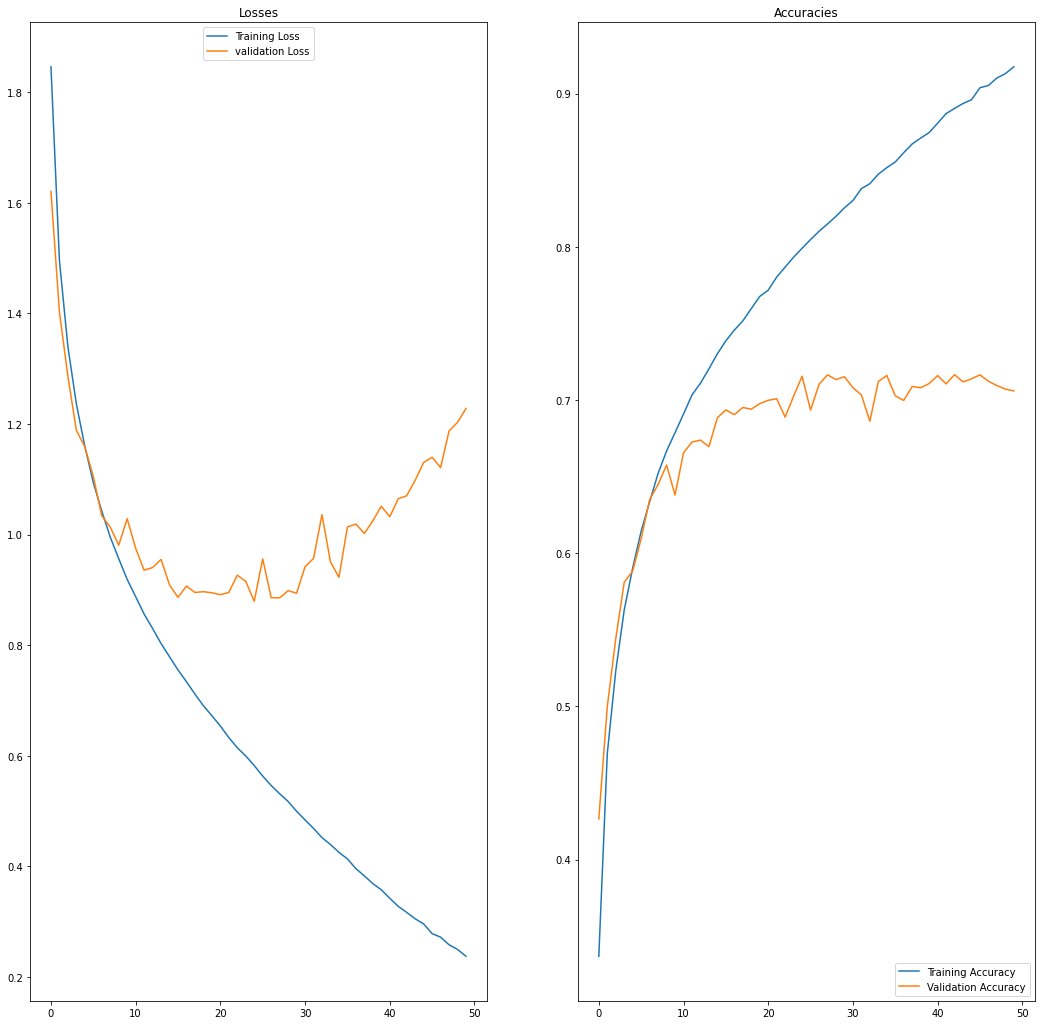

In [14]:
fig, ax = plt.subplots(1,2, figsize = (18,18))
ax[0].plot(range(50), training_history.history['loss'], label = 'Training Loss')
ax[0].plot(range(50), training_history.history['val_loss'], label= 'validation Loss')
ax[0].legend(loc ='upper center')
ax[0].set_title('Losses')
ax[1].plot(range(50), training_history.history['accuracy'], label = 'Training Accuracy')
ax[1].plot(range(50), training_history.history['val_accuracy'], label = 'Validation Accuracy')
ax[1].legend(loc='lower right')
ax[1].set_title('Accuracies')
plt.show()